<a href="https://colab.research.google.com/github/megha1627/64018_QMM/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### A case study on heart disease prediction 


#### Importing Packages to train, build, and testing the models.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#### Loading Dataset which is extracted from kaggle

In [ ]:
df=pd.read_csv('heart.csv')
#df.FastingBS=df.FastingBS.astype('object')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


### DATA EXPLORATORY ANALYSIS

In [ ]:
df.isna().sum() 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.describe() #describes the features and attributes

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.info() #it will show brief information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.duplicated().value_counts() #it checks whether null values are present or not

False    918
dtype: int64

In [ ]:
df.select_dtypes('object').columns #it shows the column names and type of those in the given dataset

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

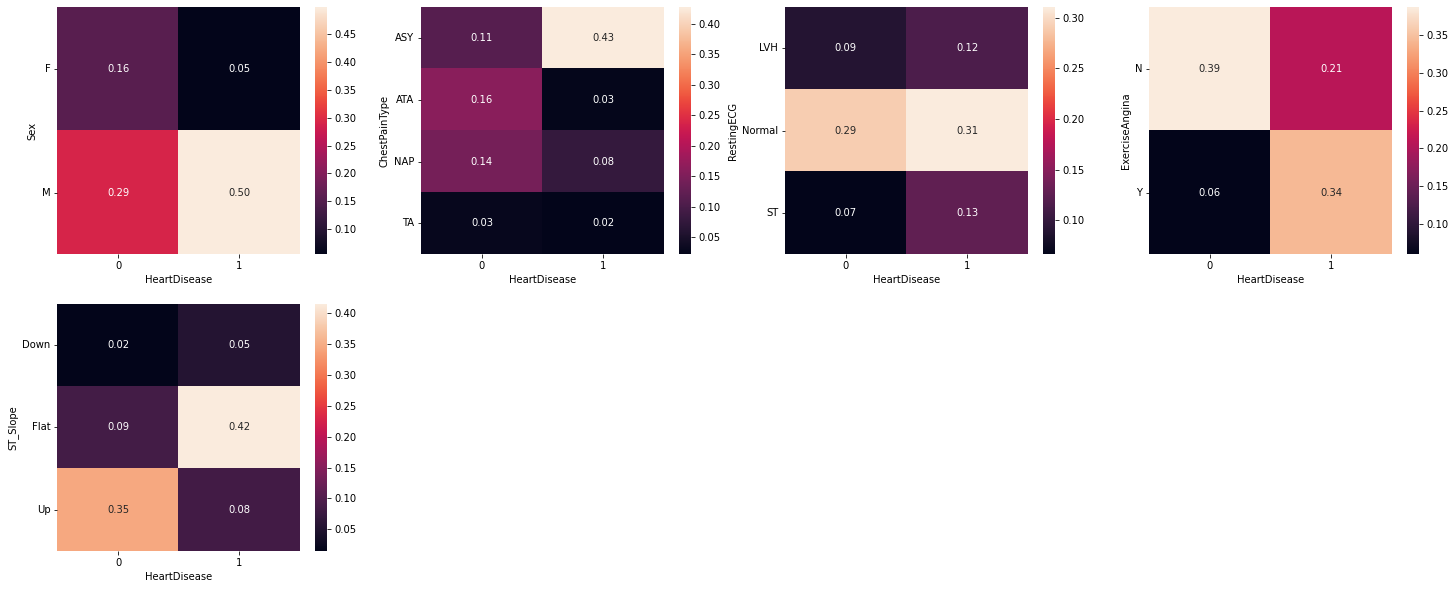

In [ ]:
def suplots(columns,main,norm=True):  #   Function to create subplots of heatmaps between all categories and one main feature
    i=0
    plt.figure(figsize=(25,10))
    for t in columns:
        # Set Location
        plt.subplot(2,4,i+1)
        # Plot
        sns.heatmap(pd.crosstab(df[columns[i]],df[main],normalize=norm),annot=True,fmt="0.2f")
        # Title
        # plt.title(columns[i])
        #Rotate Y values
        plt.yticks(rotation=0)
        i+=1
  
suplots(df.select_dtypes('object').columns,'HeartDisease')

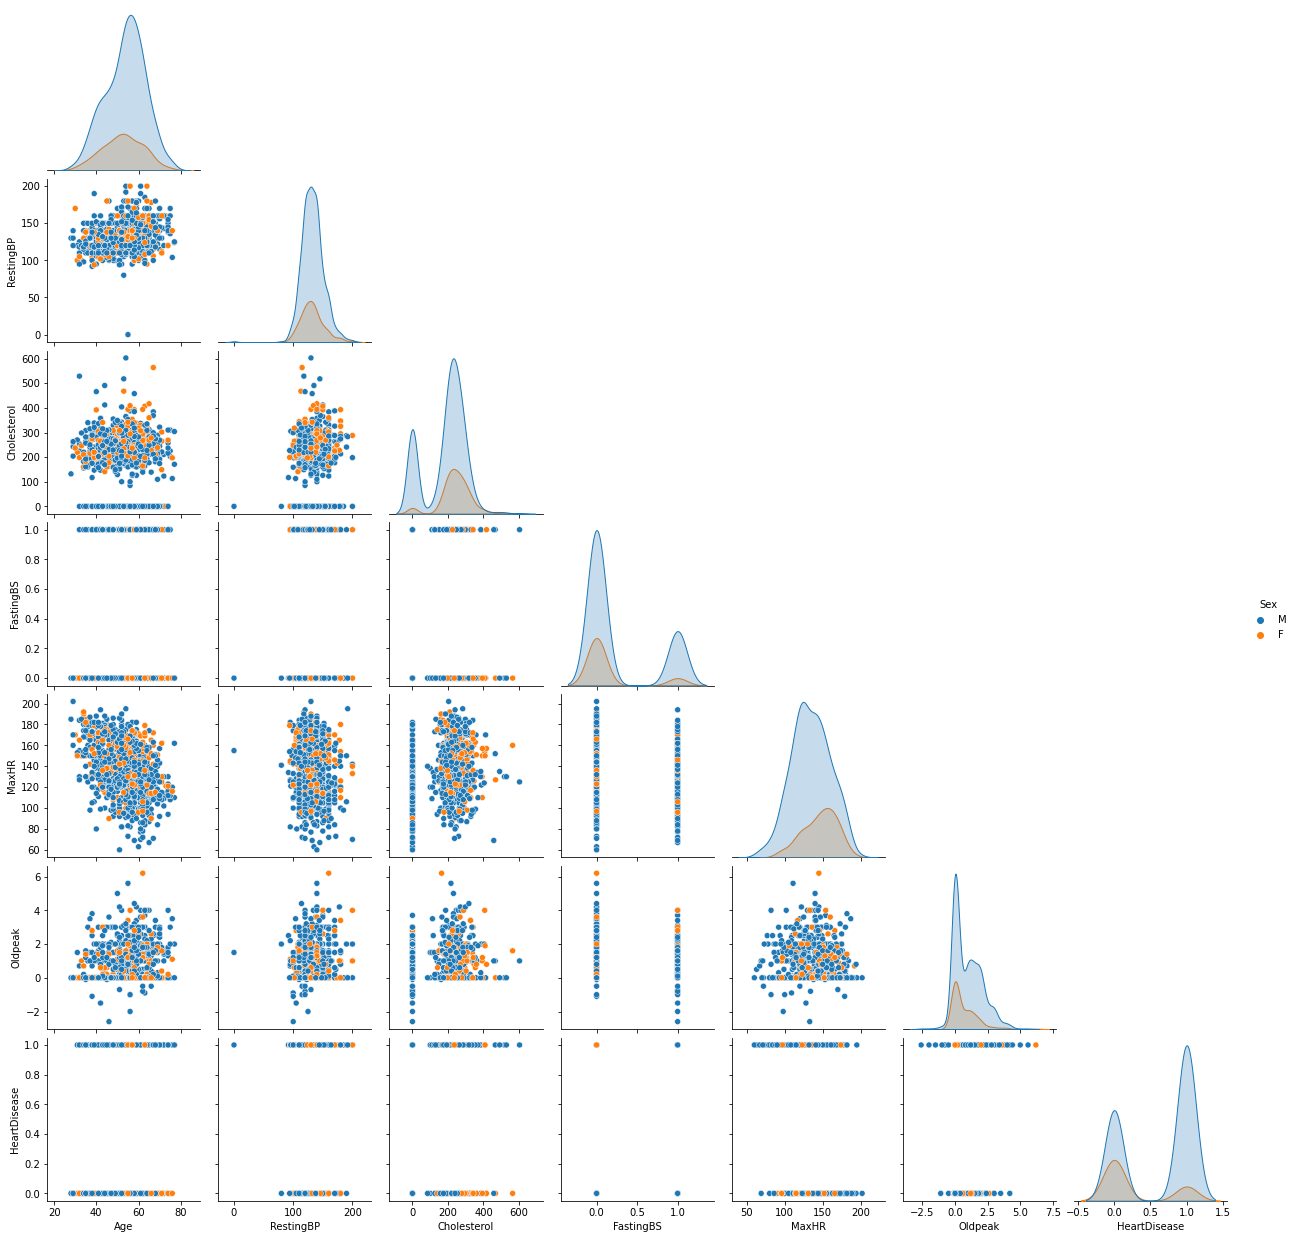

In [ ]:
sns.pairplot(df,corner=True,hue='Sex')  #pairplot for the given dataset which allows us to plot pairwise relationships between the variales within the dataset.

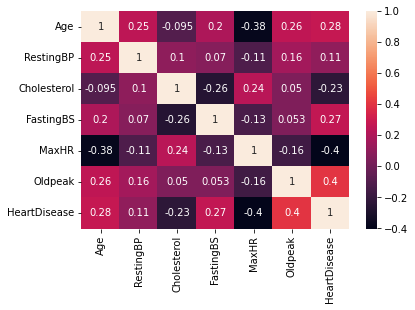

In [ ]:
sns.heatmap(df.corr(),annot=True)  #heatmap is a graphical repsentation of data where individual values that are contained in a matrix are presented as colours.

In [ ]:
df.HeartDisease.value_counts()  #it shows the count of both people having heart diseases and not having heart disease.

1    508
0    410
Name: HeartDisease, dtype: int64

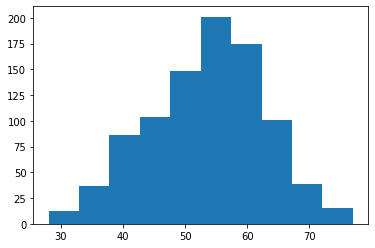

In [ ]:
plt.hist(df.Age);  #histogram

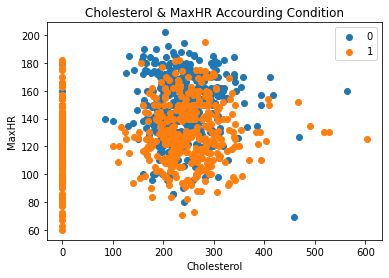

In [ ]:
plt.scatter(df.Cholesterol[df.HeartDisease==0],df.MaxHR[df.HeartDisease==0]) #scatterplot between cholestrol & accourding condition
plt.scatter(df.Cholesterol[df.HeartDisease==1],df.MaxHR[df.HeartDisease==1])
plt.xlabel("Cholesterol")
plt.ylabel("MaxHR")
plt.title("Cholesterol & MaxHR Accourding Condition")
plt.legend(df.HeartDisease)    

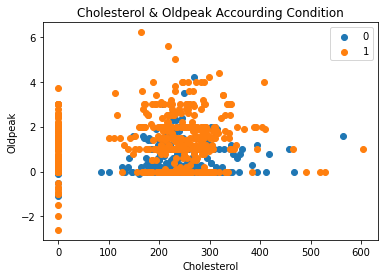

In [ ]:
plt.scatter(df.Cholesterol[df.HeartDisease==0],df.Oldpeak[df.HeartDisease==0])   #scatterplot between cholestrol & oldpeak
plt.scatter(df.Cholesterol[df.HeartDisease==1],df.Oldpeak[df.HeartDisease==1])
plt.xlabel("Cholesterol")
plt.ylabel("Oldpeak")
plt.title("Cholesterol & Oldpeak Accourding Condition")
plt.legend(df.HeartDisease)

In [ ]:
# Create Column from Cholesterol  
df['cat_Cholesterol']=np.asarray(df.Cholesterol==0).astype('object')

### PRE - PROCESSING

In [ ]:
from sklearn.preprocessing import LabelEncoder,PolynomialFeatures,OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

cat=df.select_dtypes('object').columns[:-1].tolist()
cat_trans=Pipeline([('oe',OneHotEncoder(handle_unknown='ignore',drop='first'))])

num=df.select_dtypes(np.number).columns[:-1].tolist()[:-1]
pl_trans=Pipeline(steps=[('pl',PolynomialFeatures(5))])


preprocessor=ColumnTransformer([('cat_trans',cat_trans,cat)])

x=df.drop('HeartDisease',axis=1)
y=df.HeartDisease

### BUILDING A MODEL

In [ ]:
import warnings
warnings.simplefilter('ignore')

In [ ]:
from sklearn.model_selection import train_test_split   #splitting as training(80%) & testing(20%) datasets

x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.2,random_state=6)

for l in x_tr,x_te,y_tr,y_te:
    print(len(l))

734
184
734
184


In [ ]:
from sklearn.linear_model import LogisticRegression #building logistic regression, K-Neighbours, and SVM models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
def df_clfs(x_train=x_tr,y_train=y_tr,x_test=x_te,y_test=y_te,
            classifier=[LogisticRegression(max_iter=1000),KNeighborsClassifier(),SVC()]):
    """
    Function To Create Plot For Score of Classifiers with No Tunning
    """
    b_s={}
    for cl in classifier:
        clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",cl)])
        clf.fit(x_train,y_train)
        b_s[f"{cl}".split("(")[0]+" : ("+f"{clf.score(x_test,y_test)}"[:4]+")"]=clf.score(x_test,y_test)
        clfs=pd.DataFrame(b_s,index=["Scores"])
        plt.barh(clfs.columns,clfs.loc['Scores'],align="center",color='orange')

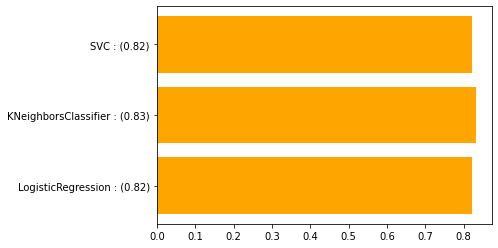

In [ ]:
df_clfs()   #showing accuries in barplot

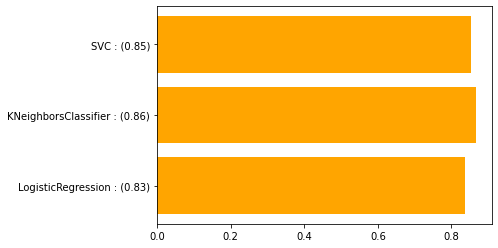

In [ ]:
from sklearn.model_selection import cross_val_score  #validation scores for implemented models

def rec_clfs(x,y,classifier=[LogisticRegression(max_iter=1000),KNeighborsClassifier(),
                             SVC()]):
    """
    Function To Create Plot From Mean Of Cross Validation Scores `Recall` of Classifiers with No Tunning
    """
    b_s={}
    for cl in classifier:
        clf=Pipeline(steps=[('preprocessor',preprocessor),('pl_trans',pl_trans),("clf",cl)])
        val=np.mean(cross_val_score(clf,x,y,scoring="recall"))
        b_s[f"{cl}".split("(")[0]+" : ("+f"{val}"[:4]+")"]=val
        clfs=pd.DataFrame(b_s,index=["Scores"])
        plt.barh(clfs.columns,clfs.loc['Scores'],align="center",color='orange')

rec_clfs(x,y)

### GOT HIGHEST ACCURACY FOR K NEIGHBOUR CLASSIFIER, SO, IT THE BEST MODEL AMONG THE THREE